# nb_opma_rayleigh/main.ipynb

In [1]:
%matplotlib inline
import sys
sys.path.append('./opmap/opmap/')

In [2]:
from RawCam import RawCam
from VmemMap import VmemMap
from PhaseMap import PhaseMap
from PhaseVarianceMap import PhaseVarianceMap

In [3]:
import copy
import pandas as pd
import os
import numpy as np

## Parameters

In [4]:
#! find /mnt/recordings/ExperimentData/ -type d -maxdepth 2

In [5]:
srcdir = "/mnt/recordings/ExperimentData/"
outdir = "/mnt/recordings/AnalysisResult/nb_opmap_rayleigh/"

_param = {
    'path' : None,
    'threshold' : None,
    'size' : None,
    'cam_type' : "sa4",
    'image_width' : 512,
    'image_height' : 512,
    'frame_start' : 0,
    'frame_end' : 1000
}

sessions = [
#     "2004-08-06/C001S0004",
    "20080902-2/C001S0027"
    
]

sizes = [3,9,15,21]

thresholds = np.arange(0.4, 1.0, 0.1)


In [6]:
params = []
for sess in sessions:
    for s in sizes:
        for threshold in thresholds:
            param = copy.copy(_param)
            param["path"] = os.path.join(srcdir, sess)
            param["size"] = s
            param["threshold"] = threshold
            params.append(param)
    
dict_param = {}
for key in _param.keys():
    dict_param[key] = [param[key] for param in params ]
    
dict_param
df = pd.DataFrame(dict_param)
df

,cam_type,frame_end,frame_start,image_height,image_width,path,size,threshold
0,sa4,1000,0,512,512,/mnt/recordings/ExperimentData/20080902-2/C001...,3,0.4
1,sa4,1000,0,512,512,/mnt/recordings/ExperimentData/20080902-2/C001...,3,0.5
2,sa4,1000,0,512,512,/mnt/recordings/ExperimentData/20080902-2/C001...,3,0.6
3,sa4,1000,0,512,512,/mnt/recordings/ExperimentData/20080902-2/C001...,3,0.7
4,sa4,1000,0,512,512,/mnt/recordings/ExperimentData/20080902-2/C001...,3,0.8
5,sa4,1000,0,512,512,/mnt/recordings/ExperimentData/20080902-2/C001...,3,0.9
6,sa4,1000,0,512,512,/mnt/recordings/ExperimentData/20080902-2/C001...,9,0.4
7,sa4,1000,0,512,512,/mnt/recordings/ExperimentData/20080902-2/C001...,9,0.5
8,sa4,1000,0,512,512,/mnt/recordings/ExperimentData/20080902-2/C001...,9,0.6
9,sa4,1000,0,512,512,/mnt/recordings/ExperimentData/20080902-2/C001...,9,0.7


In [7]:
param = params[0]

In [8]:
## RawCam

param_opmap = copy.copy(_param)
del(param_opmap["threshold"])
del(param_opmap["size"])
param_opmap['path'] = param['path']

cam = RawCam(**param_opmap)

# cam.showFrame(showFrame)

## VmemMap

vmem = VmemMap(cam)
vmem.setDiffRange(diff_min=20)

# vmem.showFrame(showFrame)
# vmem.showROI()

## PhaseMap

pmap = PhaseMap(vmem, shrink=int(param['image_width']/128))
pmap.morphROI(closing=10)
pmap.morphROI(erosion=10)
pmap.setRectROI(top=10)

# pmap.showFrame(showFrame)
# pmap.showROI()

## PhaseVarianceMap

pvmap = PhaseVarianceMap(pmap, size=param['size'])
pvmap.morphROI(erosion=param['size'])

# pvmap.showFrame(showFrame)
# pvmap.showROI()

./opmap/opmap/VideoData.py:9: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.data = np.zeros((length, height, width), dtype=np.float32)
/root/.pyenv/versions/anaconda3-4.1.1/lib/python3.5/site-packages/numpy/core/numeric.py:190: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  a = empty(shape, dtype, order)
./opmap/opmap/PhaseMap.py:27: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = scipy.signal.lfilter(b, 1, y)[numtaps/2:]
./opmap/opmap/PhaseMap.py:29: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y_ = np.r_[y, np.zeros(numtaps/2)]


0
0
1
2
3


./opmap/opmap/VideoData.py:17: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  im = plt.imshow(self.data[frame, :, :], vmin=self.vmin, vmax=self.vmax, cmap=self.cmap)


4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


0


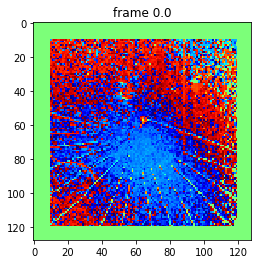

In [9]:
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

fig = plt.figure()

interval = param['frame_end'] / 50

def update(i):
    print(i)
    pmap.showFrame(i*interval)
    plt.title("frame "+str(i*interval))
    
ani = animation.FuncAnimation(fig, update, interval=10*interval, frames=50)

HTML(ani.to_html5_video())
